# AFT - Image Stack Example Notebook

This notebook illustrates an example of measuring alignment in a stack of images to extract changes in organization over time

### Import packages

In [1]:
import skimage.io as io                           # For reading in images
import AFT_tools as AFT                 # AFT (Alignment by Fourier Transform) functions
import numpy as np                                # for math
import matplotlib.pyplot as plt                   # For plotting
%matplotlib notebook

### Read in images and define parameters

In [2]:
# read in image
imstack = io.imread('ycompound/position5_cropped.tif')

In [13]:
# AFT parameters

#### required parameters ####
window_size = 33
overlap = 0.5
neighborhood_radius = 2

#### optional parameters ####
intensity_threshold = 125
# eccentricity_threshold = 1
# im_mask = io.imread('mask').astype('bool')

#### output parameters ####
data_save_path = ''

### Calculate the local orientation

In [14]:
x, y, u, v, im_theta, im_eccentricity = AFT.image_local_order(imstack, window_size, overlap, save_path = data_save_path,
                                                              intensity_thresh=intensity_threshold, plot_overlay=False, 
                                                              plot_angles=False, plot_eccentricity=False, save_figures=False)

### Calculate the order parameter for each image

In [15]:
im_order_parameter = AFT.calculate_order_parameter(im_theta, neighborhood_radius)
# print('The order parameter is {0}'.format(im_order_parameter))

### Plot the results over time

Images in this series were taken one minute apart

<IPython.core.display.Javascript object>


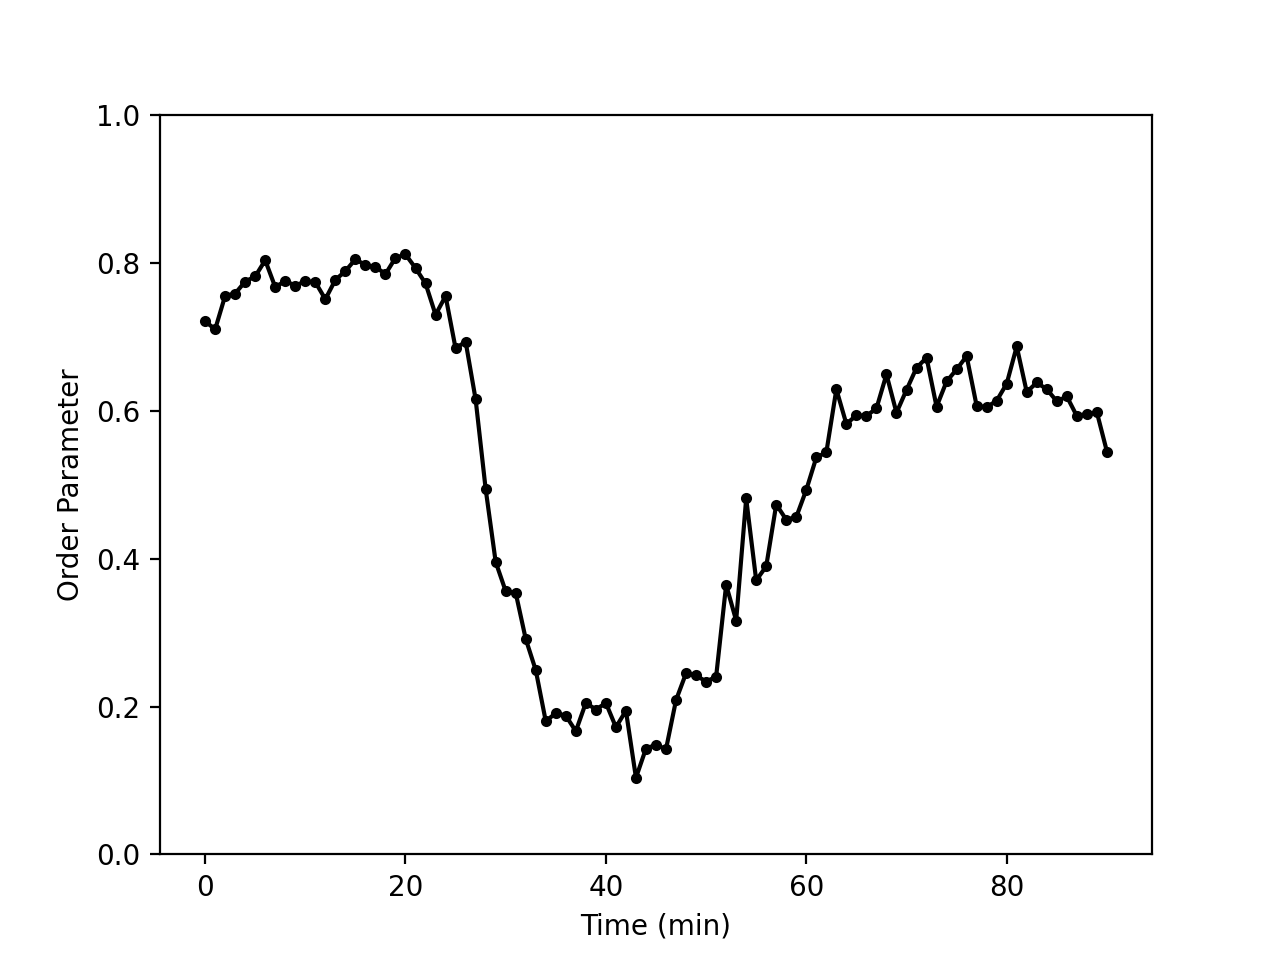

In [18]:
# create a list of time points
time = np.arange(0,imstack.shape[0])

plt.figure()
plt.plot(time, im_order_parameter, '-k.')
plt.ylabel('Order Parameter')
plt.xlabel('Time (min)')
plt.ylim(0,1)
plt.show()

### Save the data as a .csv file

In [23]:
# make an array with the time and order parameter data
data = np.column_stack((time, im_order_parameter))
# print(data)

# save the order parameter data
np.savetxt('order_parameter_values.csv', data, delimiter=',')